In [1]:
# 从环境变量获取pickle数据文件的的路径
import os
try:
    pickleFile = os.environ['pickleFile']
except KeyError as e:
    pickleFile = '/home/jean/ShinyDev/pyMelbourne/params.pkl'
print(pickleFile)

/home/jean/ShinyDev/pyMelbourne/params.pkl


In [2]:
# 从磁盘加载数据
import pickle
with open(pickleFile, 'rb') as f:
    parameters = pickle.load(f)

## 各算法性能数据

In [3]:
# 打印各种算法的性能数据
parameters["perf"]

算法    训练集    验证集      耗时
0    SVM  0.911  0.866  14.143
1     RF  0.981  0.883   8.971
2    GBR  0.979  0.902   5.320
3    XGB  0.972  0.901   4.292
4   LGBM  0.979  0.903   5.188
5    Cat  0.976  0.906   3.300
6  Blend  0.979  0.905   3.671

In [4]:
# 通过动态生成Markdown单元，在Markdown单元中填入数据，来实现与R一样的inline code功能。
from IPython.display import Markdown
Markdown("""
## 算法: {algo} 异常值阈值： {threshold}
""".format(algo=parameters["algo"], threshold=str(parameters["threshold"])))


## 算法: LigthGBM 异常值阈值： 45


In [5]:
# 画训练集或测试集拟合效果图
def PlotPrediction(true,predicted, threshold=0.2, title = "数据集: "):
    df = pd.DataFrame({"Real":true,"Predicted":predicted})
    df.sort_values(by=["Real"], inplace=True)
    df = df.reset_index(drop=True)
    fig, ax = plt.subplots()
    plt.tick_params(labelsize=15)
    ax.set_title(title + '真实值 vs 预测值', fontsize=25)
    ax.plot(list(range(0,len(df["Predicted"]))),df["Predicted"],'b.',\
            markersize=1,label='预测值')
    ax.plot(list(range(0,len(df["Real"]))),df["Real"],'r-',label='真实值') 
    ax.fill_between(list(range(0,len(df["Real"]))),df["Real"]+\
            np.log(1-threshold), df["Real"]+np.log(1+threshold),\
            facecolor='yellow',interpolate=True)
    plt.xlabel("样本", fontsize=20)
    plt.ylabel("对数房价", fontsize=20)
    plt.legend(loc='upper left',fontsize=20);
    plt.show()   

## 训练集拟合效果

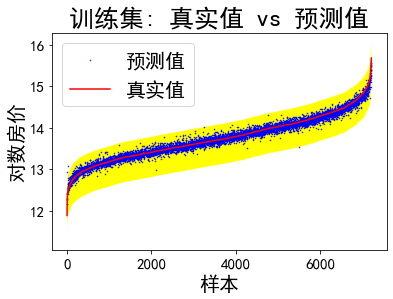

In [6]:
# 画训练集拟合效果图
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train = parameters["trainSelected"]
threshold = float(parameters["threshold"])/100
PlotPrediction(train["origin"], train["predict"], threshold, "训练集: ")

## 测试集拟合效果

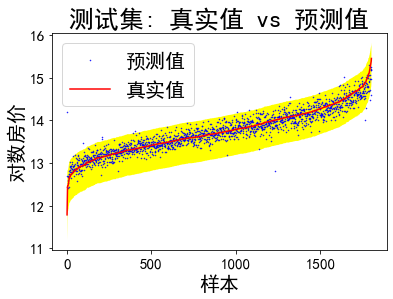

In [7]:
# 画测试集拟合效果图
valid = parameters["validSelected"]
threshold = float(parameters["threshold"])/100
PlotPrediction(valid["origin"], valid["predict"], threshold, "测试集: ")

## 测试集阈值外的异常值列表

In [8]:
# 打印异常值的第一页
outliers = parameters["outliers"]
outliers.columns = ["纬度","经度","距离CBD","建筑面积","占地面积","建成年份",\
                    "出售年份","类型", "真实值", "预测值", "偏差%", "行号"]
# outliers
print(outliers.head(5).to_string(index=False))

       纬度        经度  距离CBD  建筑面积   占地面积   建成年份  出售年份 类型       真实值        预测值    偏差%   行号
-37.87160 144.98280    6.0  49.0    0.0 1970.0  2017  U 1210000.0  367302.95 -0.696 5138
-37.79440 145.03390    6.0  90.0 1065.0 1910.0  2016  H 2875000.0 1203746.39 -0.581 8728
-37.81457 145.02455    5.0 160.0  613.0 2013.0  2018  H 4630000.0 2195948.02 -0.526 2728
-37.81152 145.04885    5.0 115.0  774.0 2004.0  2018  H 3900000.0 1947312.70 -0.501 5265
-37.85410 145.06430    9.0  30.0    0.0 1930.0  2016  H 2975000.0 1610738.52 -0.459 2316


## 选中的行号

In [9]:
# 列出选中的行号
parameters["rows_selected"]

'5138,8728,2728,8910,5999'